# Trexquant Internship Kaggle Competition - Template Notebook

---
**<center>Welcome to the Trexquant Internship Kaggle Competition!</center>**

### Background

Publicly traded US companies must report their earnings four times a year during what are known as **earnings announcement periods**. These periods often bring heightened scrutiny from investors, leading to increased stock returns. Stock prices can fluctuate dramatically around these announcements: if earnings are released before the market opens, prices may change significantly that day; if released after closing, the following day could see notable shifts. This creates unique opportunities for profit, as investors can capitalize on these stock price movements.

### Overview

In this challenge, you will use the provided features to **predict stock returns on earnings announcement days**. This involves both <u>feature engineering</u> and <u>machine learning modeling</u> to improve the accuracy of your predictions.

Use this notebook as a starting point for the Kaggle competition. The notebook includes examples of loading the provided data, conducting exploratory data analysis (EDA), creating and fitting a simple linear regression model, and generating predictions for submission. You are encouraged to build upon and enhance this baseline notebook.

---

## Imports

In [ ]:
!ls /kaggle/input/interncompetitionnotebook

TQ_Test_Kaggle.csv  TQ_Train_Kaggle.csv


In [56]:
from sklearn.linear_model import (LinearRegression, HuberRegressor,
                              	RANSACRegressor, TheilSenRegressor)


In [57]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.seasonal import seasonal_decompose


pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
pd.set_option('display.width', 2000)
pd.set_option('display.float_format', '{:20.2f}'.format)
pd.set_option('display.max_colwidth', None)

## Load Training Dataset
Load and review Training Dataset

---

## Table Documentation
### - Target

| Column Name | Description                          |
| ----------- | ------------------------------------ |
| **target**  | Stock return on earnings announcement days |

### - Features
**Note:** all feature columns are prefiex by a character `f`, for example: `f1, f2, ..., f87`.

| Column Name        | Description                                                                   |
| ------------------ | ----------------------------------------------------------------------------- |
| **f1** | Feature 1 |
| **f2** | Feature 2 |
| **f{i}** | Feature {i} |
| **f87** | Feature 87 |

In [58]:
import pandas as pd

# Load the training data
df_train = pd.read_csv("TQ_Train_Kaggle.csv")
df_test= pd.read_csv("TQ_Test_Kaggle.csv")

# Display the shape of the dataframe
print("Shape of the training dataset:", df_train.shape)

# Display the column names of the dataframe
print("\nColumns in the training dataset:\n", list(df_train.columns))

# Extract feature columns: columns that are prefixed with 'f'
feature_prefix = 'f'
feats = [col for col in df_train.columns if col.startswith(feature_prefix)]

# Display the number of feature columns and their names
print("\nNumber of feature columns:", len(feats))
print("\nFeature columns:\n", feats)

Shape of the training dataset: (105442, 89)

Columns in the training dataset:
 ['row_id', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10', 'f11', 'f12', 'f13', 'f14', 'f15', 'f16', 'f17', 'f18', 'f19', 'f20', 'f21', 'f22', 'f23', 'f24', 'f25', 'f26', 'f27', 'f28', 'f29', 'f30', 'f31', 'f32', 'f33', 'f34', 'f35', 'f36', 'f37', 'f38', 'f39', 'f40', 'f41', 'f42', 'f43', 'f44', 'f45', 'f46', 'f47', 'f48', 'f49', 'f50', 'f51', 'f52', 'f53', 'f54', 'f55', 'f56', 'f57', 'f58', 'f59', 'f60', 'f61', 'f62', 'f63', 'f64', 'f65', 'f66', 'f67', 'f68', 'f69', 'f70', 'f71', 'f72', 'f73', 'f74', 'f75', 'f76', 'f77', 'f78', 'f79', 'f80', 'f81', 'f82', 'f83', 'f84', 'f85', 'f86', 'f87', 'target']

Number of feature columns: 87

Feature columns:
 ['f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10', 'f11', 'f12', 'f13', 'f14', 'f15', 'f16', 'f17', 'f18', 'f19', 'f20', 'f21', 'f22', 'f23', 'f24', 'f25', 'f26', 'f27', 'f28', 'f29', 'f30', 'f31', 'f32', 'f33', 'f34', 'f35', 'f36', 'f37',

In [59]:
df_train_full = pd.read_csv("TQ_Train_Kaggle.csv")
df_test_full= pd.read_csv("TQ_Test_Kaggle.csv")

---

## Exploratory Data Analysis

In this Exploratory Data Analysis (EDA) section, we aim to provide an initial overview of the dataset by calculating **key descriptive statistics** for each feature.

We begin by loading the training dataset and extracting the feature columns. For each feature, we compute various statistics such as **count, mean, median, percentiles, and the number of positive, negative, and NaN values**.

This process helps us understand the distribution and characteristics of the features, enabling us to identify potential patterns and anomalies in the data. The resulting statistics are displayed in a structured DataFrame for easy interpretation and further analysis.

In [64]:
import pandas as pd
import numpy as np

# Function to get descriptive statistics for a given array
def get_descriptive_statistics(arr):
    # Total number of values in the array
    num_values = len(arr)

    # Count NaN values
    num_nan_values = np.isnan(arr).sum()

    # Filter finite and non-zero values
    finite_non_zero_values = arr[np.isfinite(arr) & (arr != 0)]
    num_finite_non_zero_values = len(finite_non_zero_values)

    # Count positive and negative values
    num_positive_values = (finite_non_zero_values > 0).sum()
    num_negative_values = (finite_non_zero_values < 0).sum()

    # Calculate descriptive statistics if there are finite non-zero values
    if num_finite_non_zero_values > 0:
        percentiles = np.percentile(finite_non_zero_values, [25, 50, 75])
        median = np.median(finite_non_zero_values)
        mean = np.mean(finite_non_zero_values)
        max_value = np.max(finite_non_zero_values)
        min_value = np.min(finite_non_zero_values)
    else:
        percentiles = [np.nan, np.nan, np.nan]
        median = np.nan
        mean = np.nan
        max_value = np.nan
        min_value = np.nan

    return {
        "count_of_values": num_values,
        "count_of_nan_values": num_nan_values,
        "count_finite_non_zero": num_finite_non_zero_values,
        "count_of_positive": num_positive_values,
        "count_of_negative": num_negative_values,
        "25th_percentile": percentiles[0],
        "50th_percentile": percentiles[1],
        "75th_percentile": percentiles[2],
        "mean": mean,
        "median": median,  # Ensure 'median' is included
        "max": max_value,
        "min": min_value
    }

# Assuming `feats` is a list of feature names and `df_train` is your DataFrame
feats = df_train.columns.tolist()  # Example: replace with your actual features list

# Initialize a list to record descriptive statistics for each feature
data_stats_recorder = []

# Calculate and record descriptive statistics for each feature
for f in feats:
    feat_array = np.array(df_train[f])
    data_stats = get_descriptive_statistics(feat_array)
    data_stats_recorder.append(data_stats)

# Convert the list of dictionaries to a DataFrame
df_data_stats = pd.DataFrame(data_stats_recorder, index=feats)

# Transpose the DataFrame for better readability
df_data_stats = df_data_stats.T

# Display the DataFrame of descriptive statistics
display(df_data_stats)

# Ensure 'mean' and 'median' are present
if 'mean' in df_data_stats.index and 'median' in df_data_stats.index:
    # Calculate the number of features where mean > median (positive skew)
    mean_greater_than_median = (df_data_stats.loc['mean'] > df_data_stats.loc['median']).sum()

    # Calculate the number of features where mean < median (negative skew)
    mean_less_than_median = (df_data_stats.loc['mean'] < df_data_stats.loc['median']).sum()

    print(f"Number of features where mean > median (positively skewed): {mean_greater_than_median}")
    print(f"Number of features where mean < median (negatively skewed): {mean_less_than_median}")
else:
    print("The 'mean' or 'median' are not present in the DataFrame index.")


,row_id,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30,f31,f32,f33,f34,f35,f36,f37,f38,f39,f40,f41,f42,f43,f44,f45,f46,f47,f48,f49,f50,f51,f52,f53,f54,f55,f56,f57,f58,f59,f60,f61,f62,f63,f64,f65,f66,f67,f68,f69,f70,f71,f72,f73,f74,f75,f76,f77,f78,f79,f80,f81,f82,f83,f84,f85,f86,f87,target
count_of_values,105442.00,105442.00,105442.00,105442.00,105442.00,105442.00,105442.00,105442.00,105442.00,105442.00,105442.00,105442.00,105442.00,105442.00,105442.00,105442.00,105442.00,105442.00,105442.00,105442.00,105442.00,105442.00,105442.00,105442.00,105442.00,105442.00,105442.00,105442.00,105442.00,105442.00,105442.00,105442.00,105442.00,105442.00,105442.00,105442.00,105442.00,105442.00,105442.00,105442.00,105442.00,105442.00,105442.00,105442.00,105442.00,105442.00,105442.00,105442.00,105442.00,105442.00,105442.00,105442.00,105442.00,105442.00,105442.00,105442.00,105442.00,105442.00,105442.00,105442.00,105442.00,105442.00,105442.00,105442.00,105442.00,105442.00,105442.00,105442.00,105442.00,105442.00,105442.00,105442.00,105442.00,105442.00,105442.00,105442.00,105442.00,105442.00,105442.00,105442.00,105442.00,105442.00,105442.00,105442.00,105442.00,105442.00,105442.00,105442.00,105442.00
count_of_nan_values,0.00,0.00,0.00,71288.00,0.00,0.00,0.00,76603.00,13061.00,0.00,0.00,0.00,44300.00,30968.00,18989.00,18939.00,13320.00,0.00,0.00,0.00,97357.00,37336.00,53868.00,17019.00,18674.00,16415.00,15075.00,15218.00,12987.00,56821.00,0.00,602.00,5584.00,0.00,7412.00,6659.00,17915.00,50124.00,97477.00,7691.00,75125.00,103469.00,11717.00,1245.00,41817.00,41796.00,81920.00,83046.00,18921.00,42741.00,0.00,16859.00,15951.00,6204.00,0.00,11536.00,80495.00,3212.00,0.00,11426.00,0.00,0.00,85710.00,67962.00,4438.00,3251.00,20448.00,0.00,0.00,20168.00,0.00,43633.00,15246.00,90871.00,172.00,17526.00,29299.00,13407.00,35.00,1.00,84017.00,45106.00,19370.00,14744.00,18592.00,11185.00,41953.00,0.00,0.00
count_finite_non_zero,105442.00,105442.00,105442.00,34154.00,99578.00,90534.00,103494.00,28839.00,92381.00,105426.00,105442.00,105442.00,61142.00,74465.00,86453.00,86487.00,92122.00,105373.00,105442.00,105353.00,8085.00,68106.00,51574.00,88423.00,86768.00,89027.00,90367.00,90221.00,92455.00,47411.00,105234.00,104840.00,99858.00,18455.00,98000.00,98783.00,87527.00,55311.00,7965.00,97751.00,30317.00,1973.00,93708.00,104197.00,63625.00,63625.00,23522.00,22396.00,86521.00,62607.00,105282.00,88571.00,89491.00,99238.00,105442.00,93906.00,22447.00,102230.00,105442.00,94016.00,105442.00,105442.00,19732.00,29150.00,101004.00,102191.00,84910.00,83391.00,101406.00,85208.00,86558.00,61809.00,90139.00,14571.00,105226.00,87881.00,76103.00,91753.00,105407.00,105441.00,21425.00,60298.00,86022.00,90498.00,86850.00,94257.00,63489.00,105427.00,105442.00
count_of_positive,105442.00,47243.00,46250.00,17606.00,99578.00,90534.00,49719.00,13916.00,48282.00,50140.00,4475.00,15676.00,16411.00,32765.00,46203.00,55604.00,8588.00,52850.00,60649.00,52682.00,4018.00,29330.00,26797.00,26242.00,39890.00,19715.00,58169.00,45660.00,34615.00,22338.00,105234.00,44917.00,76220.00,18455.00,98000.00,84015.00,25338.00,319.00,3317.00,42949.00,13394.00,856.00,49077.00,44455.00,29404.00,32137.00,11655.00,10904.00,2833.00,62607.00,41554.00,88571.00,45144.00,47113.00,49127.00,47204.00,22447.00,51045.00,56627.00,46991.00,54467.00,75221.00,6563.00,29150.00,51688.00,49011.00,43296.00,41253.00,25662.00,85208.00,37189.00,33201.00,90139.00,2761.00,105226.00,87881.00,76103.00,44188.00,105407.00,50814.00,10817.00,60298.00,86022.00,90498.00,46360.00,40650.00,61073.00,57904.00,53050.00
count_of_negative,0.00,58199.00,59192.00,16548.00,0.00,0.00,53775.00,14923.00,44099.00,55286.00,100967.00,89766.00,44731.00,41700.00,40250.00,30883.00,83534.00,52523.00,44793.00,52671.00,4067.00,38776.00,24777.00,62181.00,46878.00,69312.00,32198.00,44561.00,57840.00,25073.00,0.00,59923.00,23638.00,0.00,0.00,14768.00,62189.00,54992.00,4648.00,54802.00,16923.00,1117.00,44631

Number of features where mean > median (positively skewed): 56
Number of features where mean < median (negatively skewed): 33


## Seasonal Decomposition

In [36]:
result_add = seasonal_decompose(df_train['target'], model='additive',filt=None, period=500, two_sided=True, extrapolate_trend=0)

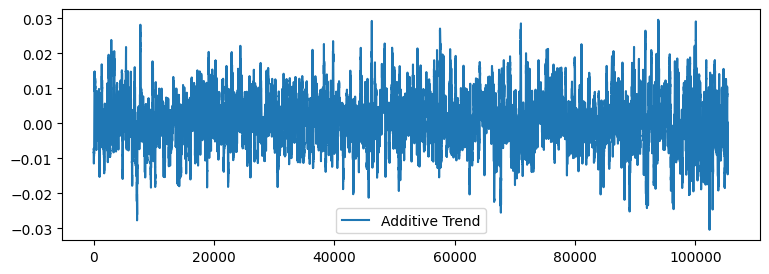

In [23]:
plt.figure(figsize=(9, 3))
 
plt.plot(result_add.trend, label='Additive Trend')
plt.legend()

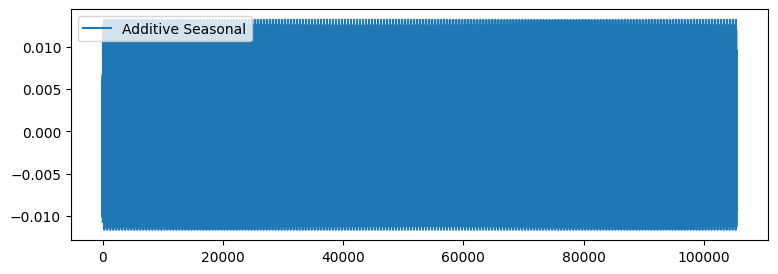

In [55]:
plt.figure(figsize=(9, 3))
 
plt.plot(result_add.seasonal, label='Additive Seasonal')
plt.legend()

In [ ]:
sma_window = 7  # 7-day moving average
sma = df_train['target'].rolling(window=sma_window).mean()

In [ ]:
ema_window = 30  # 30-day moving average
ema = df_train['target'].ewm(span=ema_window, adjust=False).mean()

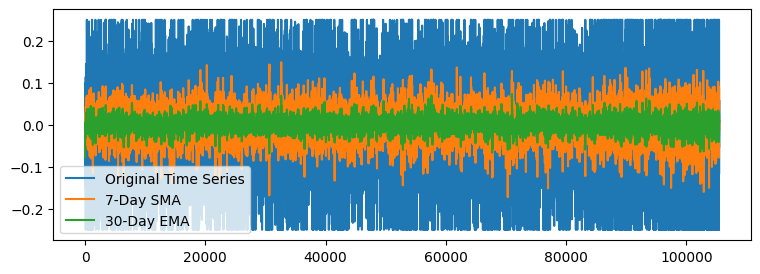

In [53]:
plt.figure(figsize=(9, 3))
plt.plot(df_train['target'], label='Original Time Series')
plt.plot(sma, label=f'{sma_window}-Day SMA')
plt.plot(ema, label=f'{ema_window}-Day EMA')
plt.legend()

## Cross Correlation

In [ ]:
import pandas as pd

# Assuming df_train_procc is your DataFrame
# Compute the correlation matrix
corr_matrix = df_train.corr().abs()


# Set the threshold for highly correlated features
threshold = 0.80

# Find pairs of highly correlated features
high_corr_pairs = [(i, j, corr_matrix.iat[i, j])
                   for i in range(corr_matrix.shape[0])
                   for j in range(i+1, corr_matrix.shape[1])
                   if corr_matrix.iat[i, j] > threshold]

# Sort the pairs by correlation value in descending order
high_corr_pairs.sort(key=lambda x: -x[2])

# Print the highly correlated pairs and their correlation values
for i, j, corr in high_corr_pairs:
    print(f"{corr_matrix.index[i]} and {corr_matrix.columns[j]}: {corr:.2f}")


## Autocorrelation with lagged features

In [67]:
def autocorrelation(x, y, lag=1):
    return x.corr(y.shift(lag))

autocorr_values = {}
for column in df_train.columns:
    if column != 'target':
        autocorr_values[column] = autocorrelation(df_train[column], df_train['target'])

# Set the threshold for selecting important features
autocorr_threshold = 0.5

# Select features with high autocorrelation values with the target
important_features_AC = [feature for feature, autocorr in autocorr_values.items() if abs(autocorr) > autocorr_threshold]

In [ ]:
for feature in important_features_AC:
    print(f"{feature}: {autocorr_values[feature]:.2f}")

# If you want to sort the features by their autocorrelation values
important_features_sorted = sorted(important_features_AC, key=lambda x: -abs(autocorr_values[x]))

In [69]:
import pandas as pd

# Assuming df_train is your DataFrame and 'target' is your target column
target_column = 'target'

# Define the number of lags you want to create
num_lags = 1

# Create lagged versions of the target column
for lag in range(1, num_lags + 1):
    df_train[f'{target_column}_lag{lag}'] = df_train[target_column].shift(lag)

# Drop rows with NaN values resulting from the lagging
df_train_lagged = df_train.dropna()

# Compute the correlation of each feature with each lagged target
corr_with_lagged_targets = {}
for column in df_train.columns:
    if column != target_column and not column.startswith(f'{target_column}_lag'):
        corr_with_lagged_targets[column] = {}
        for lag in range(1, num_lags + 1):
            lagged_target_col = f'{target_column}_lag{lag}'
            corr_with_lagged_targets[column][lagged_target_col] = df_train_lagged[column].corr(df_train_lagged[lagged_target_col])

# Flatten the correlation results for easier analysis
flat_corr_with_lagged_targets = [(feature, lagged_target, corr)
                                 for feature, lags in corr_with_lagged_targets.items()
                                 for lagged_target, corr in lags.items()]

# Sort the results by absolute correlation value in descending order
flat_corr_with_lagged_targets.sort(key=lambda x: -abs(x[2]))



# Set the threshold for selecting important features
lagged_corr_threshold = 0.95

# Select features with significant correlations with any lagged target
important_features_lagged = {feature for feature, lagged_target, corr in flat_corr_with_lagged_targets if abs(corr) > lagged_corr_threshold}


In [70]:
df_train.drop('target_lag1', axis=1, inplace=True)
# df_train.drop('target_lag2', axis=1, inplace=True)

In [71]:
significant_features_lagged=list(important_features_lagged)
significant_features_lagged.remove('row_id')

In [ ]:
print(significant_features_lagged)

In [75]:
df_train_procc = df_train.fillna(df_train.mean())
df_test=df_test.fillna(df_test.mean())


## Checking Autocorrelation

In [ ]:
import pandas as pd

def calculate_autocorrelation(df, max_lag=10):
    autocorr_values = {}
    for column in df.columns:
        if column != 'target':  # Skip the target column
            autocorr_values[column] = [df[column].autocorr(lag) for lag in range(1, max_lag + 1)]
    return autocorr_values

def summarize_autocorrelation(autocorr_values, threshold=0.6):
    significant_autocorr = {}
    for feature, values in autocorr_values.items():
        significant_lags = [lag + 1 for lag, value in enumerate(values) if abs(value) > threshold]
        if significant_lags:
            significant_autocorr[feature] = significant_lags
    return significant_autocorr

# Assuming df_train_procc_pca is your DataFrame
autocorr_values = calculate_autocorrelation(df_train_procc, max_lag=10)
significant_autocorr = summarize_autocorrelation(autocorr_values, threshold=0.5)

# Print features with significant autocorrelation
print("Features with significant autocorrelation and their lags:")
for feature, lags in significant_autocorr.items():
    print(f"{feature}: {lags}")

In [ ]:
significant_features = list(significant_autocorr.keys())
significant_features.remove('row_id')
print(len(significant_features))

In [ ]:
autocorr_values_test = calculate_autocorrelation(df_test, max_lag=10)
significant_autocorr_test = summarize_autocorrelation(autocorr_values_test, threshold=0.5)
significant_features_test = list(significant_autocorr_test.keys())
significant_features_test.remove('row_id')
print(len(significant_features_test))

## Identifying All Important Columns

In [ ]:
significant_features_total= list(set().union(significant_features_lagged, important_features_AC))

## Additional Features based on Autocorrelation
# significant_features_total.append('f4')
# significant_features_total.append('f30')
# significant_features_total.append('f34')

print(significant_features_total)
print(len(significant_features_total))

## Checking for Stationarity

In [ ]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller

def adf_test(series, column_name):
    result = adfuller(series)
    print(f'ADF Statistic for {column_name}: {result[0]:.4f}')
    print(f'p-value for {column_name}: {result[1]:.4f}')
    print('Critical Values:')
    for key, value in result[4].items():
        print(f'   {key}: {value:.4f}')
    if result[1] < 0.05:
        print(f"The time series {column_name} is stationary (reject the null hypothesis)")
    else:
        print(f"The time series {column_name} is not stationary (fail to reject the null hypothesis)")
    print('\n')

# Apply ADF test to each column in the DataFrame

adf_test(df_train_procc['target'],'target')


## Checking Stationarity on the features

In [ ]:
# Function to perform ADF test
def adf_test(series, column_name):
    result = adfuller(series)
    print(f'ADF Statistic for {column_name}: {result[0]:.4f}')
    print(f'p-value for {column_name}: {result[1]:.4f}')
    print('Critical Values:')
    for key, value in result[4].items():
        print(f'   {key}: {value:.4f}')
    if result[1] < 0.05:
        print(f"The time series {column_name} is stationary (reject the null hypothesis)")
    else:
        print(f"The time series {column_name} is not stationary (fail to reject the null hypothesis)")
    print('\n')

# Apply ADF test to each column in the DataFrame
for column in df_train_procc_pca.columns:
    adf_test(df_train_procc[column], column)


## Handling Missing Values

#### As the time series is stationary, mean imputation can be used

## Feature Engineering

In [371]:
def create_rolling_mean(data, columns, window_size=10, decay_factor=0.9):
    data = data.copy()  # Ensure you're working with a copy of the DataFrame
    
    for column in columns:
        weights = np.array([decay_factor**i for i in range(window_size)])
        weights /= weights.sum()  # Normalize weights to sum to 1

        def weighted_mean(values):
            # Only use the available portion of weights when the window is smaller
            current_weights = weights[-len(values):]
            return np.dot(values, current_weights) / current_weights.sum()

        data[f'{column}_weighted_rolling_mean'] = data[column].rolling(window=window_size).apply(weighted_mean, raw=True)
    
    return data

In [372]:
def create_lagged_features(data, columns, lag_steps=1):
    data = data.copy()  # Ensure you're working with a copy of the DataFrame
    
    for column in columns:
        for i in range(1, lag_steps + 1):
            data[f'{column}_lag_{i}'] = data[column].shift(i)
    
    return data

In [373]:
from scipy.fft import fft
import numpy as np
import pandas as pd

def create_fourier_features(data, columns, window_size=32):
    data = data.copy()
    
    for column in columns:
        # Initialize an empty array to store Fourier transform values
        fft_values = np.zeros(len(data))
        
        # Compute Fourier transform within rolling windows
        for i in range(len(data)):
            start_index = max(0, i - window_size + 1)
            values = data[column].values[start_index:i + 1]
            if len(values) < window_size:
                fft_values[i] = np.nan  # Handle cases where there are not enough values for FFT
            else:
                fourier_transform = fft(values)
                fft_values[i] = np.abs(fourier_transform[-1])  # Store only the FFT of the last element
        
        data[f'{column}_fft_previous'] = fft_values
    
    return data


### Was not selected in the final model

In [ ]:
# import pandas as pd
# import numpy as np

# def add_bollinger_percentb(data, columns, window=20, num_std=2):
#     """
#     Add the Bollinger Band %B feature for specified columns to the DataFrame.
#     Handles cases where upper and lower bands are equal.
    
#     :param data: DataFrame containing the columns
#     :param columns: List of column names to create %B for
#     :param window: The rolling window for calculations (default: 20)
#     :param num_std: Number of standard deviations for the bands (default: 2)
#     :return: DataFrame with added %B columns
#     """
#     data = data.copy()  # Ensure you're working with a copy of the DataFrame
    
#     for column in columns:
#         # Calculate the rolling standard deviation
#         rolling_std = data[column].rolling(window=window).std()
        
#         # Calculate Upper and Lower bands
#         upper_band = data[column] + (rolling_std * num_std)
#         lower_band = data[column] - (rolling_std * num_std)
        
#         # Calculate %B indicator, handling division by zero
#         band_diff = upper_band - lower_band
#         numerator = data[column] - lower_band
        
#         # Use np.where to handle division by zero
#         percentb = np.where(
#             band_diff != 0,
#             numerator / band_diff,
#             0.5  # Default value when bands are equal
#         )
        
#         data[f'{column}_BB_PercentB'] = percentb
    
#     return data


In [ ]:
df_train_procc_with_rolling_mean = create_rolling_mean(df_train_procc, significant_features_total)
df_train_procc_with_fourier_features = create_fourier_features(df_train_procc_with_rolling_mean, significant_features_total)
df_train_procc_with_lagged_features = create_lagged_features(df_train_procc_with_fourier_features, significant_features_total)
df_train_procc_with_lagged_features.fillna(df_train_procc_with_lagged_features.mean())

In [ ]:
df_test_procc_with_rolling_mean = create_rolling_mean(df_test, significant_features_total)
df_test_procc_with_fourier_features = create_fourier_features(df_test_procc_with_rolling_mean, significant_features_total)
df_test_procc_with_lagged_features = create_lagged_features(df_test_procc_with_fourier_features, significant_features_total)
df_test_procc_with_lagged_features.fillna(df_test_procc_with_lagged_features.mean())

## To extract X_Train and Y_train

In [ ]:
columns_to_drop=[]
columns_to_drop.append('target')
print(columns_to_drop)

In [377]:
column_names = df_train_procc_with_lagged_features.columns.tolist()


In [378]:
df_train_procc_with_lagged_features=df_train_procc_with_lagged_features.fillna(df_train_procc_with_lagged_features.mean())
df_test_procc_with_lagged_features=df_test_procc_with_lagged_features.fillna(df_test_procc_with_lagged_features.mean())

In [379]:
train_feature_names = [col for col in column_names if col not in columns_to_drop]
test_feature_names = [col for col in column_names if col not in columns_to_drop]

X_train = df_train_procc_with_lagged_features[train_feature_names].to_numpy()
Y_train = df_train_procc_with_lagged_features['target'].to_numpy()
X_test = df_test_procc_with_lagged_features[test_feature_names].to_numpy()

# XG-Boost

In [ ]:
!pip install xgboost

## Hyperparameters Tuning

In [241]:
import xgboost as xg
from xgboost import XGBRegressor
from xgboost import plot_importance

In [243]:
import optuna
from optuna.integration import OptunaSearchCV
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error

In [333]:
def objective(trial):
    params = {
        'learning_rate': trial.suggest_uniform('learning_rate', 0.0001, 0.2),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'subsample': trial.suggest_uniform('subsample', 0.4, 1.0),
        'n_estimators': trial.suggest_int('n_estimators', 500, 5000, step=100),
        'gamma': trial.suggest_loguniform('gamma', 1e-4, 1.0),
        'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-2, 100),
        'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-2, 100),
        'min_child_weight': trial.suggest_categorical('min_child_weight', [6, 8, 10, 12]),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0)
    }
    
    
    model = XGBRegressor(**params)
    
    # Use TimeSeriesSplit for cross-validation
    tscv = TimeSeriesSplit(n_splits=3)
    scores = []
    
    for i, (train_index, test_index) in enumerate(tscv.split(X_train)):
        X_train_cv, X_test_cv = X_train[train_index], X_train[test_index]
        Y_train_cv, Y_test_cv = Y_train[train_index], Y_train[test_index]
        
        
        model.fit(X_train_cv, Y_train_cv)
        Y_pred = model.predict(X_test_cv)
        score = mean_squared_error(Y_test_cv, Y_pred)
        scores.append(score)
    
    return np.mean(scores)

In [ ]:
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=150)

# Get the best parameters found by Optuna
best_params = study.best_params
best_score = study.best_value

print("Best parameters found:", best_params)
print("Best score found (mean squared error):", best_score)

In [382]:
new_parameters={'learning_rate': 0.001529439670775995, 'max_depth': 5, 'subsample': 0.7521074863456195, 'n_estimators': 4000, 'gamma': 0.030137330905107573, 'reg_alpha': 1.3354311073488407, 'reg_lambda': 4.087121032204353, 'min_child_weight': 6, 'colsample_bytree': 0.9993780042252339}

In [ ]:
model_optuna = XGBRegressor(**new_parameters)

# Train the model on your training data
model_optuna.fit(X_train, Y_train)

# Make predictions on the test data
Y_pred_optuna = model_optuna.predict(X_test)

In [255]:
Y_train_optuna=model_optuna.predict(X_train)
print(mean_squared_error(Y_train,Y_train_optuna))

0.004140841634225395


## Output File Generation

In [ ]:
# Create DataFrame for predictions
df_output = pd.DataFrame({"row_id": np.array(df_test['row_id']), 'target': Y_pred_optuna})

# Define filename for saving predictions
filename = "predictions_XGBOOST_AutoCorrelation_deeptuning_final.csv"

# Save predictions to CSV file
df_output.to_csv(filename, index=False)

print(f"Successfully Saved in File: {filename}")
print('\nParticipants can download "predictions.csv" and upload it using the "Submit Prediction" button on the competition page.')

# Display the first 10 rows of predictions DataFrame
print("\nFirst few rows of saved predictions:")
display(df_output.head(n=10))